In [0]:
!pip3 install newspaper3k

     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 7.4MB 53.7MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 194kB 54.6MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=43375c30bcf1f49a2c7d1b0aa8f34e43bab5836f84a4a7c631e7df091fb0fe9a
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13539 sha256=a595dc2cc30a894e3c5bb4d97f7c055260e39ad0550878ad72ab617a5c46a58c
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=d8d202a76f130998c22b08c1c7ea56dda458d2ca6246c674bb0c21d4d9c524e1
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32

In [0]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from newspaper import Article
import nltk

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
url = "https://timesofindia.indiatimes.com/world"
req = requests.get(url)

In [0]:
soup = BeautifulSoup(req.content, 'html5lib') 
table = soup.findAll('a', attrs = {'class':'w_img'})

In [59]:
len(table)
table

[<a class="w_img" href="/world/europe/france-to-outline-plans-to-lift-coronavirus-lockdown/articleshow/75426949.cms" pg="-world/europe#Story_View-1-geturl" title="France to outline plans to lift coronavirus lockdown"><img alt="France to outline plans to lift coronavirus lockdown" data-src="https://static.toiimg.com/photo/75427072.cms" pg="-world/europe#Story_View-1-geturl" src="https://static.toiimg.com/photo/34824568.cms"/></a>,
 <a class="w_img" href="/videos/international/covid-19-testing-wont-be-a-problem-for-reopening-says-president-trump/videoshow/75419839.cms" pg="-videos#Video_View-1-geturl" title="Covid-19: Testing won't 'be a problem' for reopening, says President Trump"><img alt="Covid-19: Testing won't 'be a problem' for reopening, says President Trump" data-src="https://static.toiimg.com/thumb/msid-75419839,width-255,resizemode-4,imgsize-346288/75419839.jpg" pg="-videos#Video_View-1-geturl" src="https://static.toiimg.com/photo/34824568.cms"/><i class="iconvideo"></i></a>,


In [0]:
news = []
for row in table:
  if not row['href'].startswith('http'):
    news.append("https://timesofindia.indiatimes.com"+row['href'])

In [0]:
df = []
for i in news:
  article = Article(i, language='en')
  article.download()
  article.parse()
  article.nlp()
  data = {}
  data['title'] = article.title
  data['text'] = article.text
  data['keywords'] = article.keywords
  data['summary'] = article.summary
  df.append(data)

In [62]:
dataset = pd.DataFrame(df)
dataset.head()

,title,text,keywords,summary
0,France Lockdown Lift: France to outline plans ...,Nurse Sandrine poses as she works in a hotel o...,"[plans, number, times, outline, week, testing,...","Restaurants, cafes and cinemas will have to re..."
1,Covid-19: Testing won't 'be a problem' for reo...,"Apr 28, 2020, 08:40AM IST\n\nSource: AP\n\nThe...","[white, virus, president, trump, covid19, prob...","Apr 28, 2020, 08:40AM ISTSource: APThe White H..."
2,Covid-19: Some Georgia restaurants reopen for ...,"Apr 28, 2020, 08:43AM IST\n\nSource: AP\n\nWit...","[zink, reopen, georgia, customers, wearing, wi...","Apr 28, 2020, 08:43AM ISTSource: APWith tables..."
3,'Very good idea' on Kim Jong Un's health: Pres...,"Apr 28, 2020, 08:39AM IST\n\nSource: AP\n\nNor...","[korean, future, president, trump, speaking, r...","Apr 28, 2020, 08:39AM ISTSource: APNorth Korea..."
4,Covid-19: Mayor entertains residents after imp...,"Apr 27, 2020, 08:27AM IST\n\nSource: AP\n\nThe...","[way, kawakami, curfew, covid19, tshirt, enter...","Apr 27, 2020, 08:27AM ISTSource: APThe videos,..."


In [0]:
from sklearn.model_selection import train_test_split

In [64]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
online_dataset = pd.read_csv('/content/gdrive/My Drive/News Virality/OnlineNewsPopularity.csv')

In [175]:
online_dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [176]:
online_dataset.shape

(39644, 61)

In [0]:
x = online_dataset.drop(['url', ' shares'], axis= 'columns')

In [0]:
y = online_dataset[' shares']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 10)

In [246]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
clf = RandomForestRegressor(n_estimators = 100)
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [252]:
sel = SelectFromModel(clf)
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                war

In [253]:
sel.get_support()

array([False, False,  True,  True, False,  True,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False])

In [254]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

21

In [255]:
print(selected_feat)

Index([' n_tokens_content', ' n_unique_tokens', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_imgs', ' average_token_length', ' kw_max_min',
       ' kw_avg_min', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' avg_negative_polarity'],
      dtype='object')


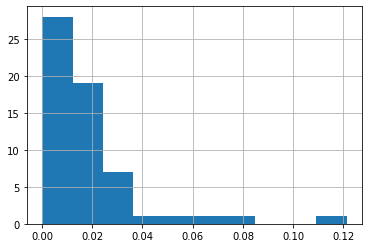

In [256]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [260]:
x_train2 = x_train[selected_feat]
x_test2 = x_test[selected_feat]
clf.fit(x_train2, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
rf_res = pd.DataFrame(clf.predict(x_train2),list(y_train))

In [262]:
rf_res.reset_index(level=0, inplace=True)
rf_res_df = rf_res.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
rf_res_df.head()

,Actual shares,Predicted shares
0,2200,2759.50
1,728,2123.40
2,946,1030.29
3,556,955.66
4,1500,1622.78


In [263]:
x_train2.head()

,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_imgs,average_token_length,kw_max_min,kw_avg_min,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,avg_negative_polarity
12865,809.0,0.450382,0.638826,7.0,6.0,4.367120,2800.0,724.500000,187316.666667,0.000000,3253.475055,1899.218236,3400.0,3400.0,3400.0,0.033334,0.866579,0.033351,0.033402,0.033334,-0.406614
6826,342.0,0.536873,0.682692,5.0,1.0,4.719298,507.0,276.333333,482566.666667,3349.017814,3768.367816,3507.604545,0.0,0.0,0.0,0.732368,0.066667,0.066672,0.067626,0.066667,-0.366667
2047,350.0,0.574405,0.697674,4.0,1.0,4.905714,503.0,360.571429,21411.111111,0.000000,2851.045977,1750.986011,1400.0,1400.0,1400.0,0.292449,0.640461,0.022223,0.022454,0.022413,-0.210417
12859,563.0,0.508197,0.737374,8.0,1.0,4.312611,165.0,82.833333,228087.500000,0.000000,5012.670124,2489.545143,1400.0,1400.0,1400.0,0.120659,0.025298,0.331193,0.176280,0.346570,-0.254487
21766,286.0,0.563380,0.724551,5.0,1.0,4.734266,628.0,260.000000,162500.000000,963.000000,3582.234548,2647.340430,718.0,1200.0,959.0,0.028585,0.028572,0.172898,0.170827,0.599116,-0.306250


I trained the model, but I have some doubts regarding how to convert the dataset that I took from Times of India Website. I took help from "https://github.com/susobhang70/OnlineNewsPopularity".